## Introduction

The Black-Scholes model was first introduced by Fischer Black and Myron Scholes in 1973 in the paper "The Pricing of Options and Corporate Liabilities". Since being published, the model has become a widely used tool by investors and is still regarded as one of the best ways to determine fair prices of options.

The purpose of the model is to determine the price of a vanilla European call and put options (option that can only be exercised at the end of its maturity) based on price variation over time and assuming the asset has a lognormal distribution.

## Assumptions

To determine the price of vanilla European options, several assumptions are made:

* European options can only be exercised at expiration
* No dividends are paid during the option's life
* Market movements cannot be predicted
* The risk-free rate and volatility are constant
* Follows a lognormal distribution

## Non-Dividend Paying Black-Scholes Formula

In Black-Scholes formulas, the following parameters are defined.

* $S$, the spot price of the asset at time $t$
* $T$, the maturity of the option. Time to maturity is defined as $T - t$
* $K$, strike price of the option
* $r$, the risk-free interest rate, assumed to be constant between $t$ and $T$
* $\sigma$, volatility of underlying asset, the standard deviation of the asset returns

#### $N(d)$ is the cumulative distribution of the standard normal variable Z

$$N(d) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^d e^{-\frac{1}{2}x^2} dx$$


$C(S,t)$ is the value at time $t$ of a call option and $P(S,t)$ is the value at time $t$ of a put option. 

The Black-Scholes call formula is given as:

$$C(S,t) = SN(d_1) - Ke^{-r(T - t)} N(d_2)$$

The put formula is given:

$$P(S,t) = Ke^{-r(T - t)}N(-d_2) - SN(-d_1)$$

Where:

$$d_1 = \frac{\ln \left(\frac{S}{K} \right) + \left(r + \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}}$$

$$d_2 = d_1 - \sigma \sqrt{T - t} = \frac{\ln \left(\frac{S}{K} \right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}$$

## Python Implementation of Black-Scholes formula for non-dividend paying options

In [38]:
import numpy as np
import scipy.stats as si
import sympy as sy
import sympy.stats as systats
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(10, 12)
import sys

In [3]:
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [65]:
euro_vanilla_call(11754,12000,.01,.08,.18)

14.481706477763737

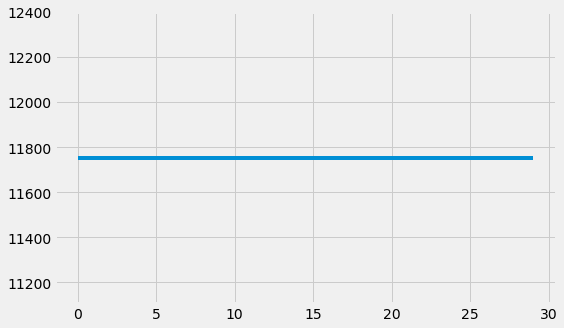

In [57]:
fig, ax = plt.subplots(figsize=(8,5))
call_price = []
for i in np.arange(30,0,-1):
    
    call_price.append(euro_vanilla_call(11754, 12000, 35, 0.1, 18.10))
#print(call_price)
plt.style.use('fivethirtyeight')
plt.plot(call_price)
plt.xticks = np.arange(1, 35, 1.0)
plt.show()

In [33]:
np.arange(10,1,-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [5]:
def euro_vanilla_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

In [6]:
euro_vanilla_put(50, 100, 1, 0.05, 0.25)

45.15029495944084

The next function can be called with 'call' or 'put' for the option parameter to calculate the desired option

In [7]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [8]:
euro_vanilla(50, 100, 1, 0.05, 0.25, option = 'put')

45.15029495944084

Sympy implementation for Exact Results

## Dividend Paying Black-Scholes Formula

For assets that pay dividends, the Black-Scholes formula is rather similar to the non-dividend paying asset formula; however, a new parameter $q$, is added. 

* $S$, the spot price of the asset at time $t$
* $T$, the maturity of the option. Time to maturity is defined as $T - t$
* $K$, strike price of the option
* $r$, the risk-free interest rate, assumed to be constant between $t$ and $T$
* $\sigma$, volatility of underlying asset, the standard deviation of the asset returns
* $q$, the dividend rate of the asset. This is assumed to pay dividends at a continuous rate

In this case, the $q$ parameter is now included in $C(S,t)$ and $P(S,t)$.

$$C(S,t) = Se^{-q(T - t)} N(d_1) - Ke^{-r(T - t)} N(d_2)$$

$$P(S,t) = Ke^{-r(T - t)} N(-d_2) - Se^{-q(T - t)} N(-d_1)$$

Then, $d_1$ and $d_2$ are slightly modified to include the continuous dividends

$$d_1 = \frac{ln \left(\frac{S}{K} \right) + \left(r - q + \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}}$$

$$d_2 = d_1 - \sigma \sqrt{T - t} = \frac{ln (\frac{S}{K}) + (r - q - \frac{\sigma^2}{2})(T - t)}{\sigma \sqrt{T - t}}$$

## Python Implementation

In [32]:
def black_scholes_call_div(S, K, T, r, q, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [21]:
def black_scholes_put_div(S, K, T, r, q, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

Implementation that can be used to determine the put or call option price depending on specification

In [22]:
def euro_vanilla_dividend(S, K, T, r, q, sigma, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

Sympy Implementation of Black-Scholes with Dividend-paying asset